<h1 style="color:#3a7aad">Phishing Detection</h1>

In [52]:
import pandas as pd
from matplotlib import pyplot as plt

<h2 style="color:#3a7aad">Mendeley Data</h2>

In [53]:
from scipy.io import arff

data = arff.loadarff('Phishing_Legitimate_full.arff')
mendeley_dataframe = pd.DataFrame(data[0])

print(len(mendeley_dataframe))
mendeley_dataframe.head()

10000


,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,3.0,1.0,5.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,-1.0,1.0,b'1'
1,3.0,1.0,3.0,144.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,1.0,-1.0,1.0,1.0,1.0,1.0,b'1'
2,3.0,1.0,2.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,-1.0,1.0,-1.0,0.0,b'1'
3,3.0,1.0,6.0,79.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-1.0,1.0,1.0,1.0,-1.0,b'1'
4,3.0,0.0,4.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,-1.0,0.0,-1.0,-1.0,b'1'


In [54]:
print(mendeley_dataframe.columns)

Index(['NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperlinksRT

In [55]:
X = mendeley_dataframe.drop(columns=['CLASS_LABEL'])
y = mendeley_dataframe['CLASS_LABEL']
# X.head()
# Y.head()

<h2 style="color:#3a7aad">Clustering</h2>

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### K-means

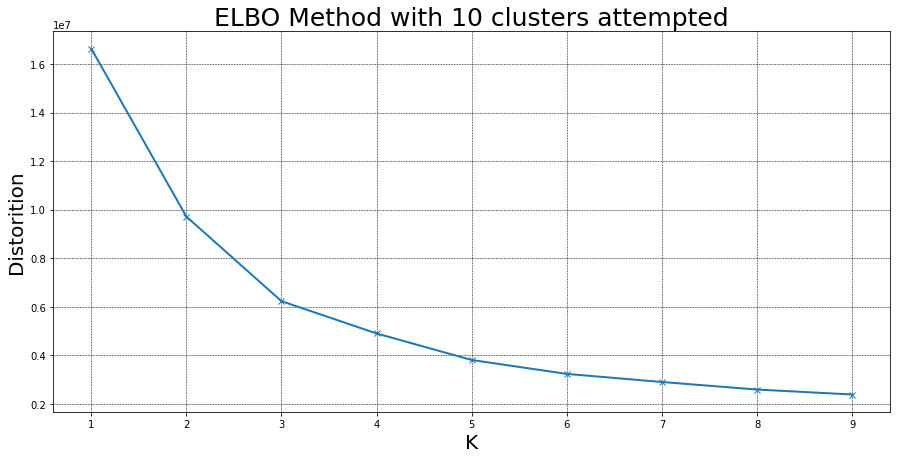

In [58]:
from sklearn.cluster import KMeans

def ELBO(iterations,df):
    dist = []
    K_range = range(1,iterations)
    for k in K_range:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(df)
        dist.append(kmeans.inertia_)
    return dist, K_range

distortions, K_range = ELBO(10, X_train)

plt.figure(figsize = (15,7))
plt.title('ELBO Method with 10 clusters attempted', size= 25)
plt.plot(K_range, distortions, 'bx-', color = '#1f77b4', linewidth = 2)
plt.xlabel('K', size = 20)
plt.ylabel('Distorition', size = 20)
plt.grid(color='black', linestyle='--', linewidth=0.5)

In [67]:
# kmeans = KMeans(n_clusters=2, tol = 0.00001, n_jobs = 20)
# kmeans.fit(X_train)
# y_pred = kmeans.predict(X_test)


# fig, axes = plt.subplots(1, 2, figsize=(30,10))
# axes[0].set_title('Original Dataframe Classification')
# axes[0].scatter(np.array(X_train)[np.where(y_train == 0)], np.array(X_train)[np.where(y_train == 0)])
# axes[0].scatter(np.array(X_train)[np.where(y_train == 1)], np.array(X_train)[np.where(y_train == 1)])
# axes[0].grid(color='black', linestyle='--', linewidth=0.5)    


# axes[1].set_title('K-means Dataframe Classification')
# axes[1].scatter(X_test[y_pred == 0], X_res[y_pred == 0])
# axes[1].scatter(X_test[y_pred == 1], X_res[y_pred == 1])
# axes[1].grid(color='black', linestyle='--', linewidth=0.5)

### t-SNE

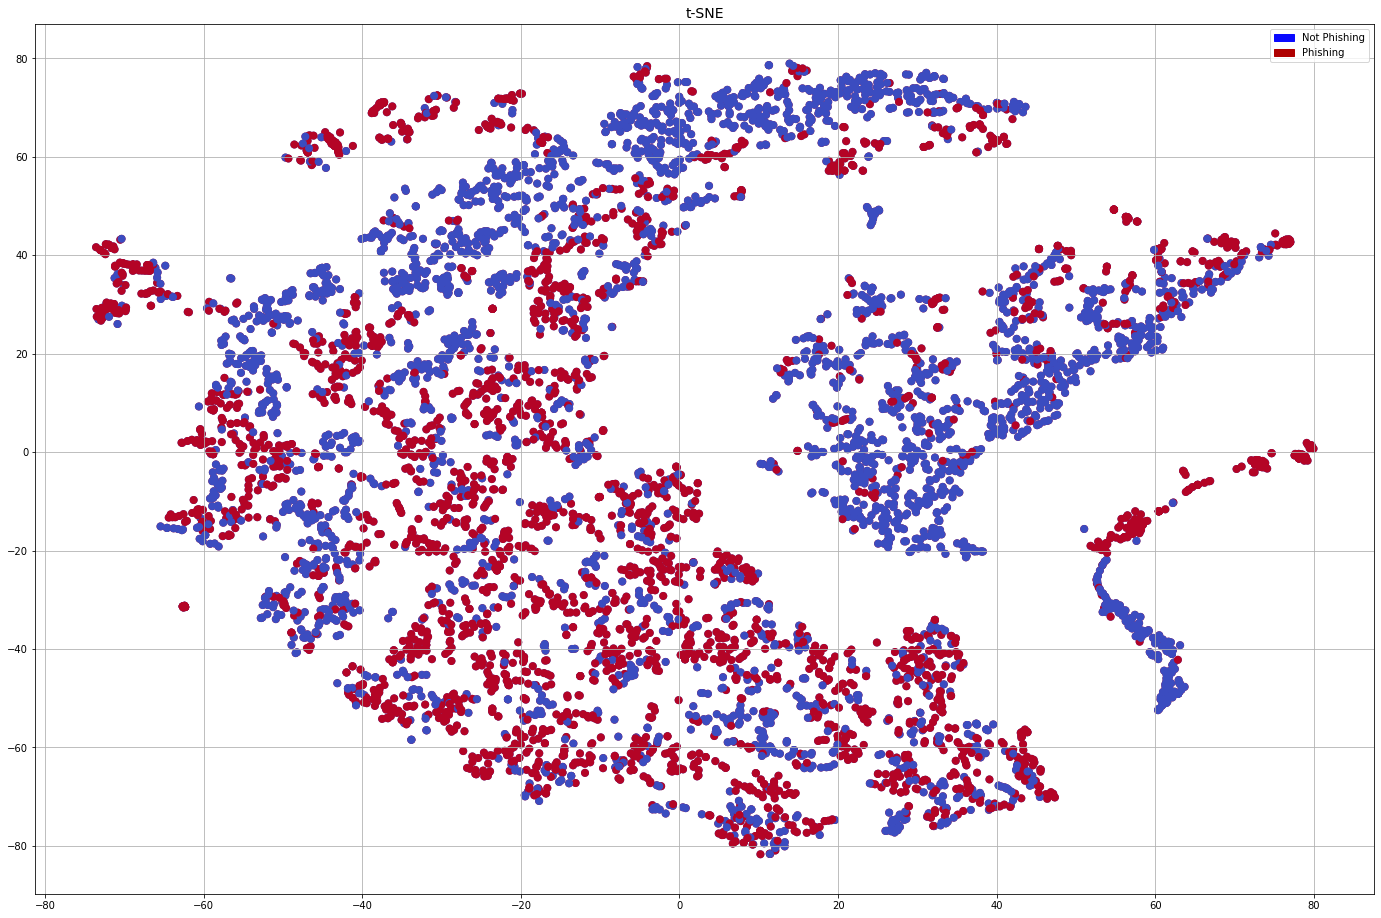

In [66]:
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches

X_embedded = TSNE(n_components = 2, random_state = 0).fit_transform(X_train)


f, ax = plt.subplots(figsize=(24,16))

blue_patch = mpatches.Patch(color='#0A0AFF', label='Not Phishing')
red_patch = mpatches.Patch(color='#AF0000', label='Phishing')

ax.scatter(X_embedded[:,0], X_embedded[:,1], c=(y_train == b'0'), cmap='coolwarm', label='Not Phishing', linewidths=2)
ax.scatter(X_embedded[:,0], X_embedded[:,1], c=(y_train == b'1'), cmap='coolwarm', label='Phishing', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

<h2 style="color:#3a7aad">Malicious and Benign websites data from Kaggle</h2>

In [37]:
MBW_data = pd.read_csv('dataset.csv')
MBW_data.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0
